# Use Apache spark to answer a few questions for the airline perform data


## Airline Performance data - 2003.csv

import packages

In [77]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as f
from pyspark.sql.functions import desc
import pandas as pd

Loading data from HDFS

In [84]:
data = '/user/student/airline/2003.csv'
df = spark.read.csv(data, header = True)

In [85]:
df.take(3)

[Row(Year='1999', Month='1', DayofMonth='27', DayOfWeek='3', DepTime='1906', CRSDepTime='1908', ArrTime='2024', CRSArrTime='2005', UniqueCarrier='US', FlightNum='1244', TailNum='N942VJ', ActualElapsedTime='78', CRSElapsedTime='57', AirTime='66', ArrDelay='19', DepDelay='-2', Origin='RIC', Dest='PHL', Distance='198', TaxiIn='3', TaxiOut='9', Cancelled='0', CancellationCode='NA', Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year='1999', Month='1', DayofMonth='28', DayOfWeek='4', DepTime='2016', CRSDepTime='1908', ArrTime='2126', CRSArrTime='2005', UniqueCarrier='US', FlightNum='1244', TailNum='N955VJ', ActualElapsedTime='70', CRSElapsedTime='57', AirTime='41', ArrDelay='81', DepDelay='68', Origin='RIC', Dest='PHL', Distance='198', TaxiIn='19', TaxiOut='10', Cancelled='0', CancellationCode='NA', Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year='1

Change departure and arrival delay data type from string to integer

In [86]:
df.printSchema()
df_1 = df.withColumn("DepDelay", df["DepDelay"].cast(IntegerType()))
df_new = df_1.withColumn("ArrDelay", df_1["ArrDelay"].cast(IntegerType()))
df_new.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- DayofMonth: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: string (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: string (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: string (nullable = true)
 |-- CarrierDelay:

### 1. Airports experience the most departure delay

In [87]:
df_delay_most = df_new.groupBy('Origin').agg(f.sum("DepDelay").alias("sum")).sort(desc("sum"))
df_delay_most.show()

+------+-------+
|Origin|    sum|
+------+-------+
|   ORD|3353833|
|   ATL|2848774|
|   DFW|2397506|
|   PHX|2068407|
|   LAX|1773129|
|   STL|1747251|
|   DTW|1552289|
|   SFO|1457665|
|   PHL|1455167|
|   LAS|1433130|
|   EWR|1432011|
|   CLT|1123673|
|   IAH|1121677|
|   DEN|1086055|
|   MSP|1083438|
|   BOS|1061244|
|   SEA|1042344|
|   PIT|1017102|
|   LGA| 971872|
|   MCO| 875637|
+------+-------+
only showing top 20 rows



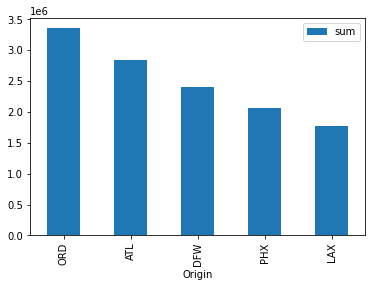

In [88]:
df_delay_most.limit(5).toPandas().plot.bar(x='Origin', y= 'sum')

### 2. Airports experience the least departure delay

In [89]:
df_delay_least = df_new.groupBy('Origin').agg(f.sum("DepDelay").alias("sum")).orderBy("sum")
df_delay_least.show()

+------+-----+
|Origin|  sum|
+------+-----+
|   GPT|-1671|
|   VPS|-1123|
|   SUX| -774|
|   LFT|    6|
|   PSC|   89|
|   MOT|  210|
|   MTJ|  222|
|   BFL|  269|
|   BGR|  424|
|   BRO|  443|
|   CHA|  451|
|   LSE|  460|
|   LWB|  583|
|   FAY|  600|
|   FWA|  607|
|   AVL|  846|
|   ELM|  992|
|   DRO|  994|
|   GUC| 1223|
|   ITH| 1421|
+------+-----+
only showing top 20 rows



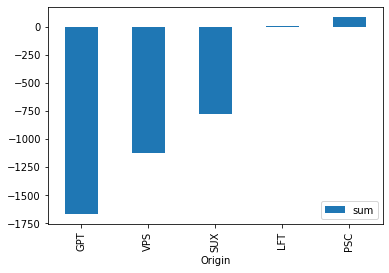

In [90]:
df_delay_least.limit(5).toPandas().plot.bar(x='Origin', y= 'sum')

### 3. Airports experience the most arrival delay

In [91]:
df_arrD_most = df_new.groupBy('Dest').agg(f.sum("ArrDelay").alias("sum")).sort(desc("sum"))
df_arrD_most.show()

+----+-------+
|Dest|    sum|
+----+-------+
| ORD|3337490|
| ATL|2229930|
| EWR|1705032|
| SFO|1636873|
| PHX|1558462|
| LAX|1461523|
| PHL|1325135|
| DFW|1247144|
| LGA|1221431|
| LAS|1170910|
| BOS|1123388|
| SEA|1080434|
| STL|1051882|
| DEN| 882359|
| BWI| 808500|
| IAH| 778844|
| PIT| 746842|
| CLT| 721095|
| MCO| 707162|
| DTW| 684841|
+----+-------+
only showing top 20 rows



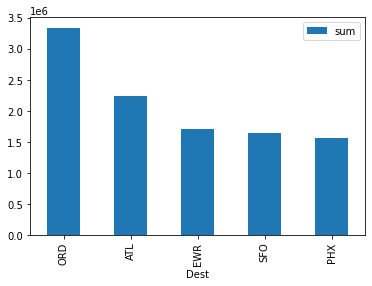

In [92]:
df_arrD_most.limit(5).toPandas().plot.bar(x='Dest', y= 'sum')

### 4. Airports experience the least arrival delay

In [94]:
df_arrD_least = df_new.groupBy('Dest').agg(f.sum("ArrDelay").alias("sum")).orderBy("sum")
df_arrD_least.show()

+----+----+
|Dest| sum|
+----+----+
| LIH|-952|
| GPT|-933|
| OGG|-651|
| LFT|  23|
| LSE|  26|
| BRO|  69|
| KOA| 224|
| MOT| 269|
| PIA| 419|
| MTJ| 547|
| DRO| 631|
| BGR| 695|
| FWA| 725|
| LWB|1002|
| GST|1192|
| BFL|1761|
| PSC|1961|
| GUC|2261|
| GTF|2417|
| AVL|2526|
+----+----+
only showing top 20 rows



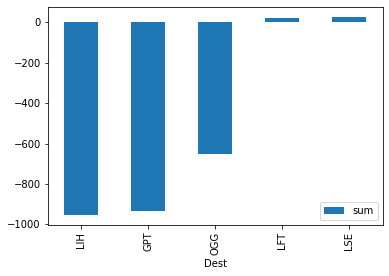

In [95]:
df_arrD_least.limit(5).toPandas().plot.bar(x='Dest', y= 'sum')

### 5. Flights experience the most arrival delay

In [59]:
df_arrD_most_f = df_new.groupBy('FlightNum').agg(f.sum("ArrDelay").alias("sum")).sort(desc("sum"))
df_arrD_most_f.show()

+---------+-----+
|FlightNum|  sum|
+---------+-----+
|      505|69530|
|      360|64218|
|      464|57720|
|      568|56390|
|     1139|54095|
|      219|53401|
|      758|53040|
|      316|51347|
|       61|50741|
|      354|50467|
|      419|50259|
|     1612|49820|
|      459|48308|
|     1484|47640|
|      240|47413|
|     1474|46803|
|      524|46779|
|      520|46749|
|       65|45613|
|       79|45032|
+---------+-----+
only showing top 20 rows



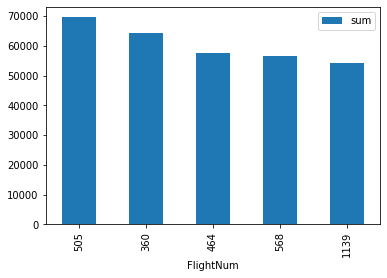

In [96]:
df_arrD_most_f.limit(5).toPandas().plot.bar(x='FlightNum', y= 'sum')

### 6. Flights experience the least arrival delay

In [61]:
df_arrD_least_f = df_new.groupBy('FlightNum').agg(f.sum("ArrDelay").alias("sum")).orderBy("sum")
df_arrD_least_f.show()

+---------+-----+
|FlightNum|  sum|
+---------+-----+
|        1|-4828|
|     2451|-2531|
|     2493|-2311|
|     2551|-2069|
|     2549|-2041|
|     2698|-2027|
|     2589|-1921|
|     1413|-1835|
|     2409|-1805|
|     2383|-1758|
|     2303|-1739|
|     2333|-1702|
|     2417|-1643|
|     2585|-1577|
|     2657|-1491|
|     2491|-1466|
|     1081|-1369|
|      169|-1354|
|     2601|-1112|
|     1385|-1076|
+---------+-----+
only showing top 20 rows



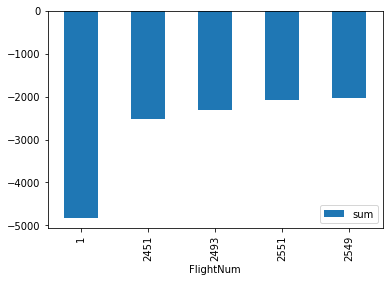

In [97]:
df_arrD_least_f.limit(5).toPandas().plot.bar(x='FlightNum', y= 'sum')

### 7. Flights experience the most departure delay

In [63]:
df_delay_most_f = df_new.groupBy('FlightNum').agg(f.sum("DepDelay").alias("sum")).sort(desc("sum"))
df_delay_most_f.show()

+---------+-----+
|FlightNum|  sum|
+---------+-----+
|      505|82722|
|     1817|73192|
|      849|66474|
|       65|65171|
|      219|63772|
|       61|62264|
|      360|59504|
|      568|59053|
|      678|58102|
|      461|57970|
|      563|57953|
|      758|57697|
|      316|56533|
|      459|55394|
|      205|55235|
|      419|54356|
|       39|54213|
|      197|53741|
|     1698|53352|
|     2554|53261|
+---------+-----+
only showing top 20 rows



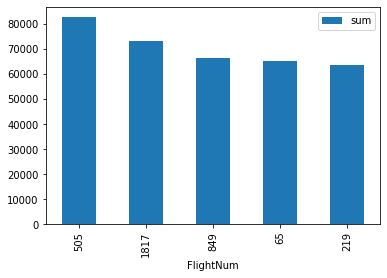

In [98]:
df_delay_most_f.limit(5).toPandas().plot.bar(x='FlightNum', y= 'sum')

### 8. Flights experience the least departure delay

In [64]:
df_delay_least_f = df_new.groupBy('FlightNum').agg(f.sum("DepDelay").alias("sum")).orderBy("sum")
df_delay_least_f.show()

+---------+----+
|FlightNum| sum|
+---------+----+
|     2551|-663|
|     2589|-635|
|     2549|-377|
|     2300|-290|
|     2523|-223|
|     6448|-172|
|     2579|-171|
|     6438|-166|
|     6449|-146|
|     6404|-136|
|     6447|-129|
|     2500|-125|
|     6515|-109|
|     6451| -99|
|     6527| -99|
|     6446| -97|
|     6450| -95|
|     6444| -93|
|     2698| -85|
|     6442| -83|
+---------+----+
only showing top 20 rows



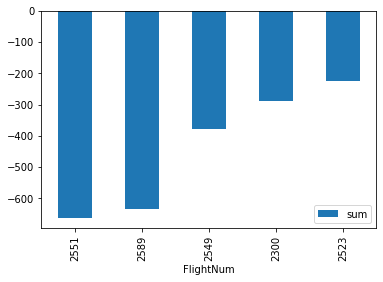

In [99]:
df_delay_least_f.limit(5).toPandas().plot.bar(x='FlightNum', y= 'sum')

### 9. Average arrival delay per carrier

In [100]:
df_arrD_avg = df_new.groupBy('UniqueCarrier').agg(f.avg("ArrDelay").alias("avg")).orderBy("avg")
df_arrD_avg.show()

+-------------+------------------+
|UniqueCarrier|               avg|
+-------------+------------------+
|           NW| 4.389880451576387|
|           TW| 6.008880764633835|
|           DL| 6.678932548316908|
|           WN|7.4698429124716865|
|           CO| 8.480354162613779|
|           AA| 8.918916508042582|
|           UA| 9.882414898898416|
|           US|10.441609242053934|
|           AS|11.003722522258553|
|           HP|13.208234475185789|
+-------------+------------------+



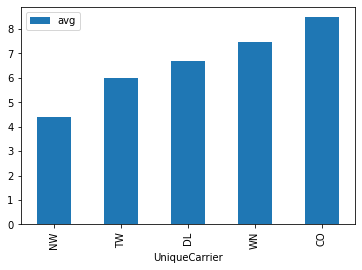

In [101]:
df_arrD_avg.limit(5).toPandas().plot.bar(x='UniqueCarrier', y= 'avg')

### 10. Average depature delay per carrier

In [81]:
df_delay_avg = df_new.groupBy('UniqueCarrier').agg(f.avg("DepDelay").alias("avg")).orderBy("avg")
df_delay_avg.show()

+-------------+------------------+
|UniqueCarrier|               avg|
+-------------+------------------+
|           NW| 6.718094058226521|
|           DL| 8.062052674456261|
|           TW|  8.20298647446099|
|           CO| 9.118107321556213|
|           AA|  9.84248138823221|
|           UA| 9.899378991741754|
|           WN|10.093180644314879|
|           US|10.408952370620462|
|           AS|10.887364496397627|
|           HP|12.003973885892705|
+-------------+------------------+



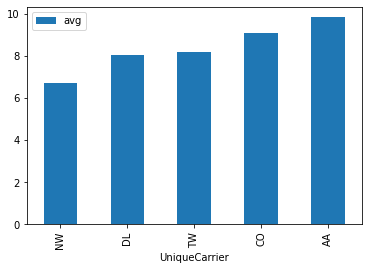

In [80]:
df_delay_avg.limit(5).toPandas().plot.bar(x='UniqueCarrier', y= 'avg')